In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, func
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)
last_year_date = dt.date(2017,8,23) - (dt.timedelta(days=365))
print(last_year_date)

('2017-08-23',)
2016-08-23


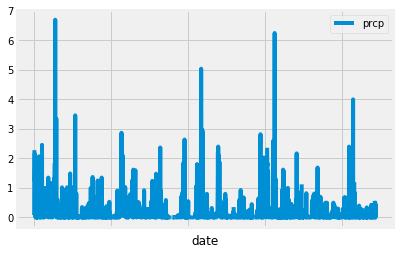

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

results = session.query( Measurement.date, Measurement.prcp).\
    filter(Measurement.date > last_year_date).\
    order_by(Measurement.date).all()

df = pd.DataFrame(results)
df.set_index('date')
df.sort_values(by='date')
df.plot('date', 'prcp')
# plt.tight_layout()
plt.show()
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Measurement.station)).group_by(Measurement.station).count()

9

In [15]:
# What are the most active stations? (i.e. what stations have the most rows)? ANSWER: 'USC00519281' is the most active
# List the stations and the counts in descending order.
session.query( Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temps=session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(temps)

[(85.0, 54.0, 71.66378066378067)]


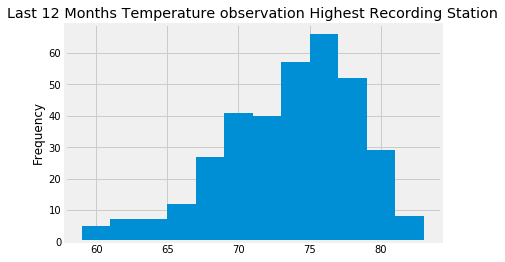

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_HNstation = session.query( Measurement.tobs).\
    filter(Measurement.date > last_year_date).filter(Measurement.station == 'USC00519281').all()
df_tobs = pd.DataFrame(temp_HNstation, columns=['tobs'])
df_tobs= df_tobs['tobs']
plt.hist(df_tobs, bins=12)
plt.ylabel('Frequency')
plt.title('Last 12 Months Temperature observation Highest Recording Station')
plt.show()